In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib notebook

In [34]:
#Getting data
X, y = load_breast_cancer(return_X_y = True)

#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
#Applying PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
print (pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [36]:
#Checking shapes
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (569, 30)
Shape after PCA:  (569, 2)


In [37]:
#Creating dataframe with new features
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
target_names = {
    0:'Good',
    1:'Bad'
}
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
pca_df.head()

,PC1,PC2,target
0,9.192837,1.948583,Good
1,2.387802,-3.768172,Good
2,5.733896,-1.075174,Good
3,7.122953,10.275589,Good
4,3.935302,-1.948072,Good


<IPython.core.display.Javascript object>


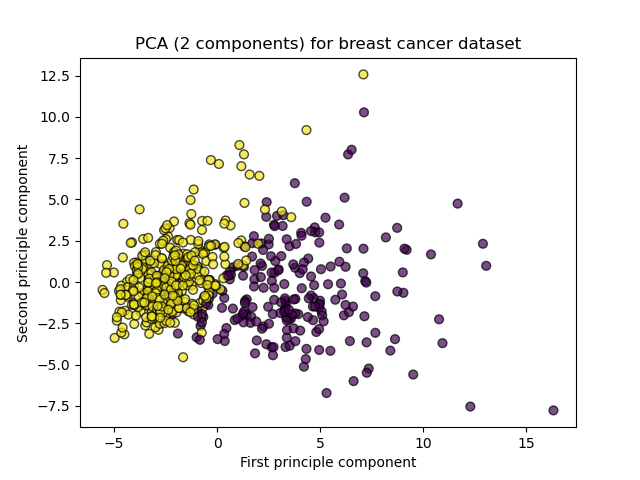

Text(0, 0.5, 'Second principle component')

In [38]:
#Plotting components
plt.figure()
colors = plt.get_cmap('viridis')
plt.scatter(pca_df['PC1'], pca_df['PC2'], edgecolor = 'black', s=40, color=colors(y*250), alpha = 0.7)
plt.title("PCA (2 components) for breast cancer dataset")
plt.xlabel('First principle component')
plt.ylabel('Second principle component')